In [ ]:
import openai
import requests
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from io import BytesIO
import textwrap
import os
from google.colab import files
from google.colab import userdata

In [2]:
api_key = userdata.get('OPENAI_API_KEY')  # nome del secret
client = openai.OpenAI(api_key=api_key)


In [74]:
!wget -q https://github.com/google/fonts/raw/main/ofl/anton/Anton-Regular.ttf -O /content/Anton-Regular.ttf


📥 Insert the LinkedIn post content to comment:
Post: "Success doesn't come from wishing. It comes from working—day in, day out. Forget luck. Trust effort. Build your own destiny."

📌 Generated comments:
1. "So you're saying my 'wish upon a star' business plan might need some tweaking?"
2. "Guess I'll cancel my subscription to the Luck & Astonishment newsletter then."
3. "Is it too late to return my magic lamp for a refund?"

Type the number of the comment you want to use: 3

✅ Selected comment: "Is it too late to return my magic lamp for a refund?"

🎨 Generating background image with DALL·E...

🎉 Meme saved to /content/sample_data/meme_finale.png


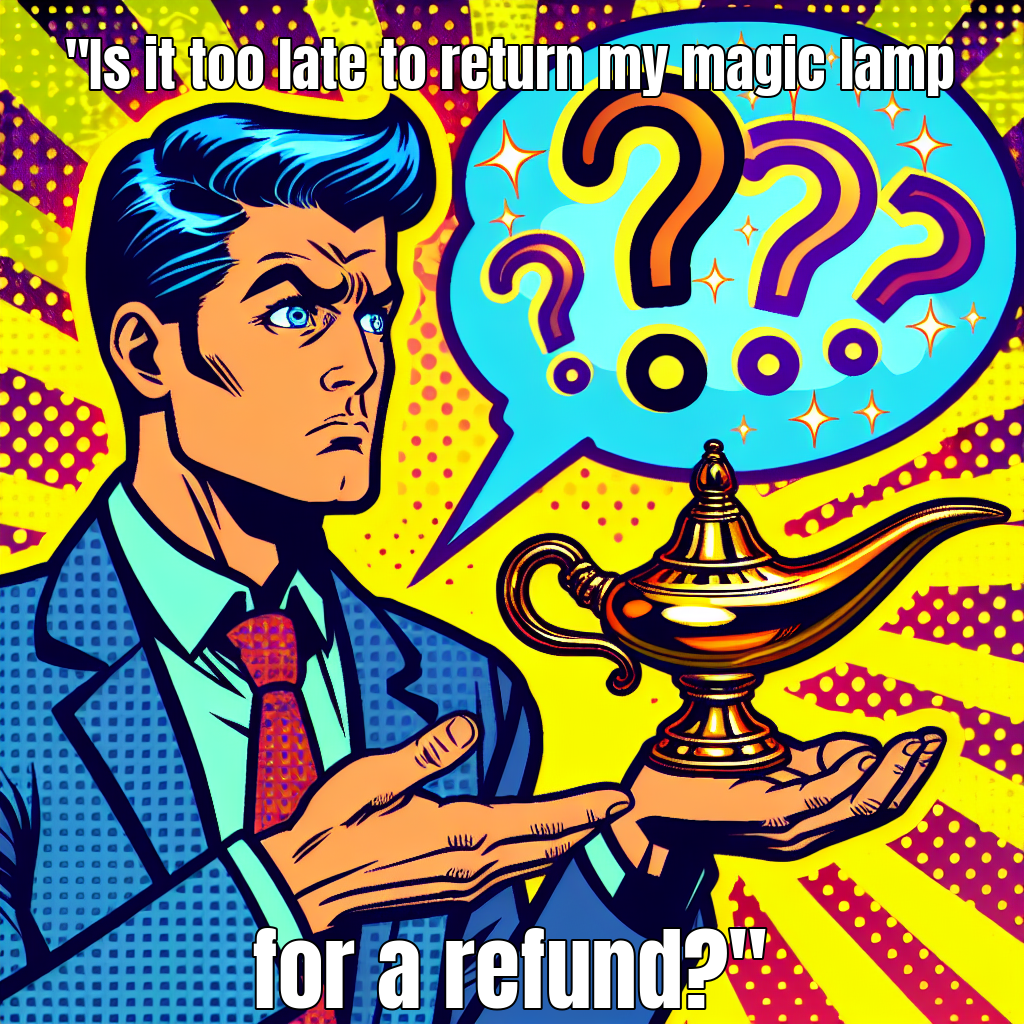

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
# configuration
OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")
client = openai.OpenAI(api_key=OPENAI_API_KEY)

FONT_PATH = "/content/Anton-Regular.ttf"
OUTPUT_IMAGE_PATH = "/content/sample_data/meme_finale.png"
DEFAULT_FONT_SIZE = 92
MARGIN = 50

# utils
def get_linkedin_post():
    print("\U0001F4E5 Insert the LinkedIn post content to comment:")
    return input("Post: ")

def generate_short_comments(post_text):
    prompt = f"""
    Read this LinkedIn post and generate 3 possible comments.
    Comments must be:
    - ironic or witty
    - short (max 20 words)
    - designed to spark engagement

    Post:
    {post_text}

    Respond only with a numbered list of 3 comments, no explanations.
    """
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.9
    )
    return [line.split(". ", 1)[1] if ". " in line else line for line in response.choices[0].message.content.strip().split("\n") if line.strip()]

def select_comment(comments):
    print("\n\U0001F4CC Generated comments:")
    for i, c in enumerate(comments):
        print(f"{i + 1}. {c}")
    choice = input("\nType the number of the comment you want to use: ")
    selected = comments[int(choice)-1].strip()
    print(f"\n✅ Selected comment: {selected}")
    return selected

def split_comment_text(text):
    parts = textwrap.wrap(text, width=40)
    if len(parts) > 2:
        return parts[0], " ".join(parts[1:])
    elif len(parts) == 2:
        return parts[0], parts[1]
    else:
        return parts[0], ""

def generate_background_image(prompt="Futuristic colorful meme style", size="1024x1024"):
    dalle_response = client.images.generate(
        model="dall-e-3",
        prompt = prompt + "only visuals, no words, no text, no captions, no signs, no lettering, no typography, visual elements only",
        n=1,
        size=size,
        quality="standard"
    )
    image_url = dalle_response.data[0].url
    response = requests.get(image_url)
    return Image.open(BytesIO(response.content)).convert("RGB")

def fit_font(draw, text, font_path, max_width, start_size=72):
    size = start_size
    while size > 10:
        try:
            font = ImageFont.truetype(font_path, size)
        except Exception as e:
            print("\U0001F6A8 Font loading failed:", e)
            return ImageFont.load_default()
        bbox = draw.textbbox((0, 0), text, font=font, stroke_width=2)
        text_width = bbox[2] - bbox[0]
        if text_width <= max_width:
            return font
        size -= 2
    return ImageFont.truetype(font_path, 10)

def draw_meme_text(image, top_text, bottom_text):
    draw = ImageDraw.Draw(image)
    w, h = image.size

    font_top = fit_font(draw, top_text, FONT_PATH, w - 2 * MARGIN, DEFAULT_FONT_SIZE)
    font_bottom = fit_font(draw, bottom_text, FONT_PATH, w - 2 * MARGIN, DEFAULT_FONT_SIZE)

    if top_text:
        top_bbox = draw.textbbox((0, 0), top_text, font=font_top, stroke_width=2)
        top_w = top_bbox[2] - top_bbox[0]
        draw.text(((w - top_w) / 2, 20), top_text, fill="white", font=font_top, stroke_width=2, stroke_fill="black")

    if bottom_text:
        bottom_bbox = draw.textbbox((0, 0), bottom_text, font=font_bottom, stroke_width=2)
        bottom_w = bottom_bbox[2] - bottom_bbox[0]
        bottom_h = bottom_bbox[3] - bottom_bbox[1]
        draw.text(((w - bottom_w) / 2, h - bottom_h - 40), bottom_text, fill="white", font=font_bottom, stroke_width=2, stroke_fill="black")

    return image

def main():
    post = get_linkedin_post()
    comments = generate_short_comments(post)
    selected_comment = select_comment(comments)
    top_text, bottom_text = split_comment_text(selected_comment)

    print("\n\U0001F3A8 Generating background image with DALL·E...")
    background_prompt = f"Meme background related to: '{selected_comment}'. Style: pop, colorful, digital."
    background = generate_background_image(prompt=background_prompt)

    meme = draw_meme_text(background, top_text, bottom_text)
    meme.save(OUTPUT_IMAGE_PATH)
    print(f"\n\U0001F389 Meme saved to {OUTPUT_IMAGE_PATH}")
    display(Image.open(OUTPUT_IMAGE_PATH))

# run
main()
files.download(OUTPUT_IMAGE_PATH)

📥 Insert the LinkedIn post content to comment:
Post: ust enrolled in yet another online productivity course. Hoping this one finally unlocks my full potential. #GrowthMindset #TimeManagement #LearningNeverStops”

📌 Generated comments:
1. "So this is the magic course that finally replaces sleep, right? #UnleashTheZzzs"
2. "When you unlock your full potential, let us know if it needs a manual override. #TechSupport"
3. "Going for the world record in course enrollments? The suspense is killing me! #LearningOlympics"

Type the number of the comment you want to use: 2

✅ Selected comment: "When you unlock your full potential, let us know if it needs a manual override. #TechSupport"

🎨 Generating background image with DALL·E...

🎉 Meme saved to /content/sample_data/meme_finale.png


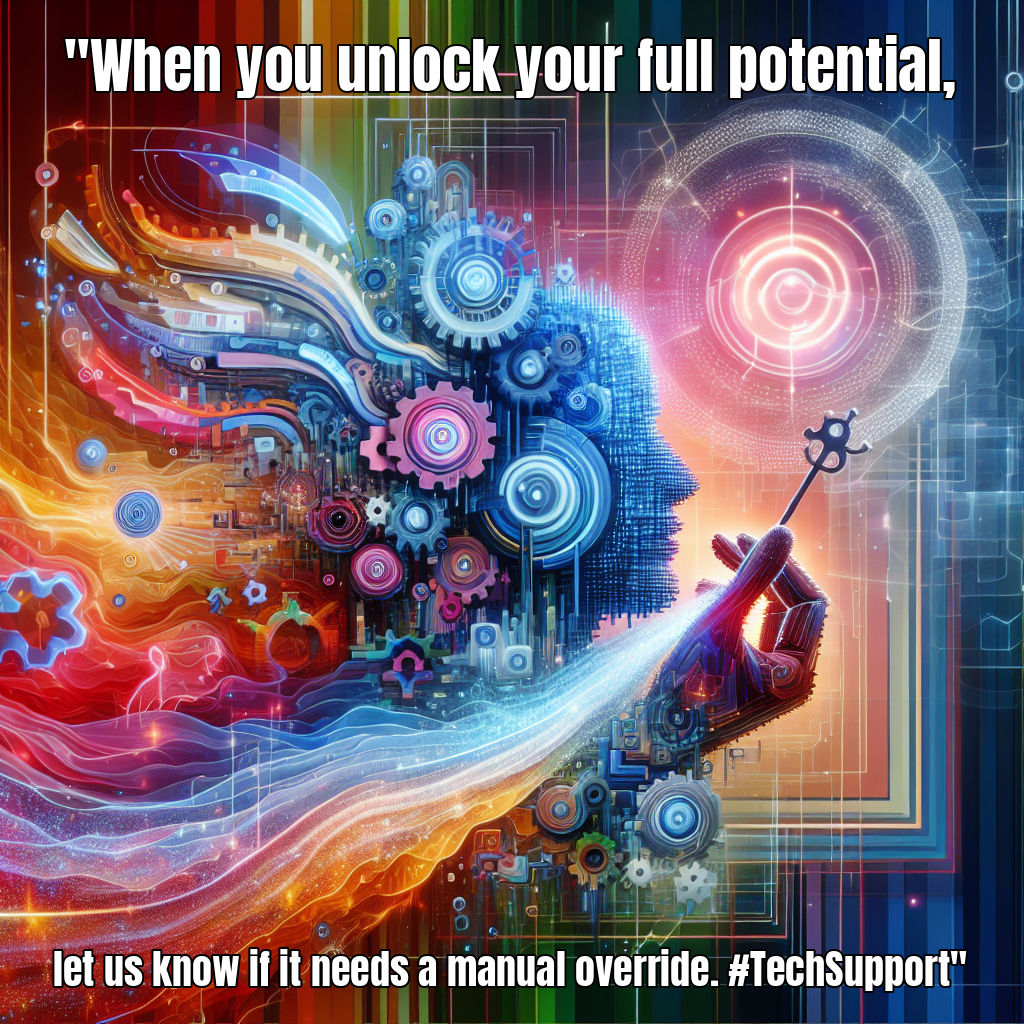

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
# configuration
OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")
client = openai.OpenAI(api_key=OPENAI_API_KEY)

FONT_PATH = "/content/Anton-Regular.ttf"
OUTPUT_IMAGE_PATH = "/content/sample_data/meme_finale.png"
DEFAULT_FONT_SIZE = 92
MARGIN = 50

# utils
def get_linkedin_post():
    print("\U0001F4E5 Insert the LinkedIn post content to comment:")
    return input("Post: ")

def generate_short_comments(post_text):
    prompt = f"""
    Read this LinkedIn post and generate 3 possible comments.
    Comments must be:
    - ironic or witty
    - short (max 20 words)
    - designed to spark engagement

    Post:
    {post_text}

    Respond only with a numbered list of 3 comments, no explanations.
    """
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.9
    )
    return [line.split(". ", 1)[1] if ". " in line else line for line in response.choices[0].message.content.strip().split("\n") if line.strip()]

def select_comment(comments):
    print("\n\U0001F4CC Generated comments:")
    for i, c in enumerate(comments):
        print(f"{i + 1}. {c}")
    choice = input("\nType the number of the comment you want to use: ")
    selected = comments[int(choice)-1].strip()
    print(f"\n✅ Selected comment: {selected}")
    return selected

def split_comment_text(text):
    parts = textwrap.wrap(text, width=40)
    if len(parts) > 2:
        return parts[0], " ".join(parts[1:])
    elif len(parts) == 2:
        return parts[0], parts[1]
    else:
        return parts[0], ""

def generate_background_image(prompt="Futuristic colorful meme style", size="1024x1024"):
    dalle_response = client.images.generate(
        model="dall-e-3",
        prompt = prompt + "only visuals, no words, no text, no captions, no signs, no lettering, no typography, visual elements only",
        n=1,
        size=size,
        quality="standard"
    )
    image_url = dalle_response.data[0].url
    response = requests.get(image_url)
    return Image.open(BytesIO(response.content)).convert("RGB")

def fit_font(draw, text, font_path, max_width, start_size=72):
    size = start_size
    while size > 10:
        try:
            font = ImageFont.truetype(font_path, size)
        except Exception as e:
            print("\U0001F6A8 Font loading failed:", e)
            return ImageFont.load_default()
        bbox = draw.textbbox((0, 0), text, font=font, stroke_width=2)
        text_width = bbox[2] - bbox[0]
        if text_width <= max_width:
            return font
        size -= 2
    return ImageFont.truetype(font_path, 10)

def draw_meme_text(image, top_text, bottom_text):
    draw = ImageDraw.Draw(image)
    w, h = image.size

    font_top = fit_font(draw, top_text, FONT_PATH, w - 2 * MARGIN, DEFAULT_FONT_SIZE)
    font_bottom = fit_font(draw, bottom_text, FONT_PATH, w - 2 * MARGIN, DEFAULT_FONT_SIZE)

    if top_text:
        top_bbox = draw.textbbox((0, 0), top_text, font=font_top, stroke_width=2)
        top_w = top_bbox[2] - top_bbox[0]
        draw.text(((w - top_w) / 2, 20), top_text, fill="white", font=font_top, stroke_width=2, stroke_fill="black")

    if bottom_text:
        bottom_bbox = draw.textbbox((0, 0), bottom_text, font=font_bottom, stroke_width=2)
        bottom_w = bottom_bbox[2] - bottom_bbox[0]
        bottom_h = bottom_bbox[3] - bottom_bbox[1]
        draw.text(((w - bottom_w) / 2, h - bottom_h - 40), bottom_text, fill="white", font=font_bottom, stroke_width=2, stroke_fill="black")

    return image

def main():
    post = get_linkedin_post()
    comments = generate_short_comments(post)
    selected_comment = select_comment(comments)
    top_text, bottom_text = split_comment_text(selected_comment)

    print("\n\U0001F3A8 Generating background image with DALL·E...")
    background_prompt = f"Meme background related to: '{selected_comment}'. Style: pop, colorful, digital."
    background = generate_background_image(prompt=background_prompt)

    meme = draw_meme_text(background, top_text, bottom_text)
    meme.save(OUTPUT_IMAGE_PATH)
    print(f"\n\U0001F389 Meme saved to {OUTPUT_IMAGE_PATH}")
    display(Image.open(OUTPUT_IMAGE_PATH))

# run
main()
files.download(OUTPUT_IMAGE_PATH)